Note: When you apply a perspective transform, choosing four source points manually, as we did in this video, is often not the best option. There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.

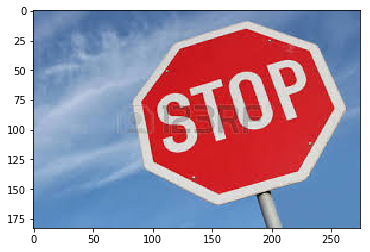

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PyQt5
%matplotlib qt
%matplotlib inline

file = "/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/09. Project (Traffic Sign Classifier)/CarND-Traffic-Sign-Classifier-Project/Downloaded_TraficSigns/sign3.jpeg"

img = mpimg.imread(file)

plt.imshow(img)


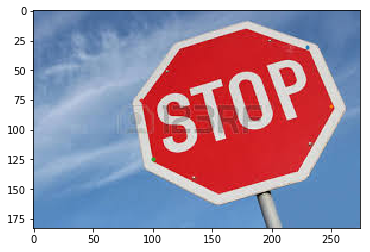

In [8]:
# after checking dot information on the image
%matplotlib inline

plt.imshow(img)
plt.plot(230, 30, '.')  # top right
plt.plot(250, 80, '.')  # bottom right
plt.plot(100, 125, '.')  # bottom left
plt.plot(90, 75, '.')  # top left



In [10]:
# Define perspective transform function
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
        [[230, 30],
         [250, 80],
         [100, 125],
         [90, 75]])
    
    dst = np.float32(
        [[200, 50],
         [200,100],
         [ 70,100],
         [ 70, 50]])
    
    # perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)
    
    # compute inverse perspective transform, Minv
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # M => Minv for inverse transform
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped
    

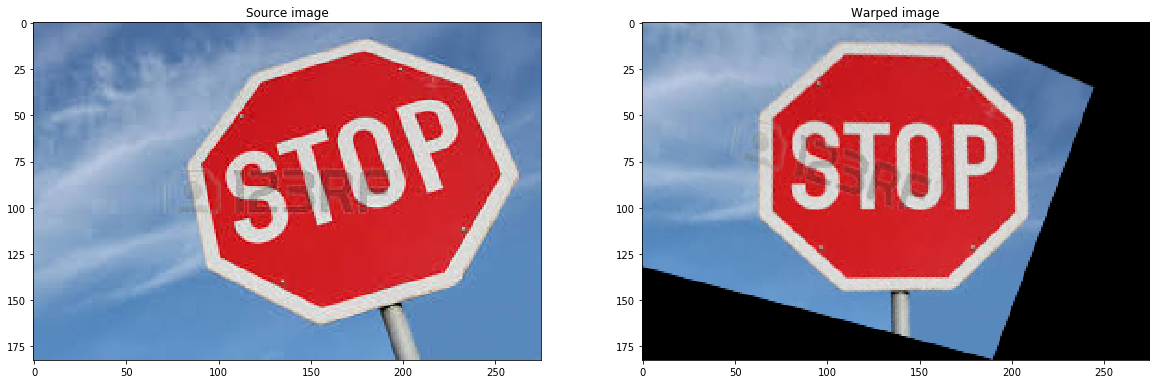

In [13]:
%matplotlib inline

warped_im = warp(img)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title('Source image')
ax1.imshow(img)
ax2.set_title('Warped image')
ax2.imshow(warped_im)

